<a href="https://colab.research.google.com/github/Muditsinghbora/AIML/blob/main/LAB_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
import numpy as np
#imports the numpy library, which is used for numerical operations in python
#here, it is mainly used to generate synthetic data
import pandas as pd
# Imports the pandas library, which is-useful for data manipulation and analysis.
# In this code, it helps store and manipulate data in a Dataframe format.
from sklearn.model_selection import train_test_split
#Imports the train_test_split function from sklearn, a machine learning library.
# This function splits the data into training and testing sets.
from sklearn.tree import DecisionTreeClassifier
# Imports the DecisionTreeClassifier from sklearn, which is used to create and train a decision tree classifier.
from sklearn import metrics
# Imports the metrics module from sklearn, which contains tools to evaluate machine learning models.
# Here, it will help compute the model's accuracy.
import matplotlib.pyplot as plt
#Imports matplotlib-pyplot for data visualization. It's used here to plot the decision tree
from sklearn.tree import plot_tree
# Imports the plot_tree function, which visualizes the decision tree structure.


In [2]:
# Step 1: Generate a synthetic dataset
# Let's create a dataset with two features and a binary target
np.random.seed(42) # For reproducibility
# Sets the random seed to 42 for reproducibility. This means that every time the code is run,
#the generated data will be the same, which is helpful for consistent results.

#Generating 100 samples for each class
feature_1_class_0 = np.random.normal(2, 1, 100) # Feature 1 for class 0
#Generates 100 values from a normal distribution centered at 2, with a standard deviation of 1,
# representing Feature_1 for samples in class 0.

feature_2_class_0 = np.random.normal(3, 1, 100) # Feature 2 for class 0
# Similar to feature_1_class_0, but the values are centered at 3.
# This represents Feature 2 for samples in class 0.

feature_1_class_1 = np.random.normal(6, 1, 100) # Feature 1 for class 1
# Generates 100 values for Feature_1 of sample in class1, centered at 6 with a standard deviation of 1.

feature_2_class_1 = np.random.normal(5, 1, 100) # Feature 2 for class 1
# Generates 100 values for Feature_2 of sample in class1, centered at 5 with a standard devaition of 1.
print(feature_1_class_0)
print(feature_2_class_0)
print(feature_1_class_1)
print(feature_2_class_1)

[ 2.49671415  1.8617357   2.64768854  3.52302986  1.76584663  1.76586304
  3.57921282  2.76743473  1.53052561  2.54256004  1.53658231  1.53427025
  2.24196227  0.08671976  0.27508217  1.43771247  0.98716888  2.31424733
  1.09197592  0.5876963   3.46564877  1.7742237   2.0675282   0.57525181
  1.45561728  2.11092259  0.84900642  2.37569802  1.39936131  1.70830625
  1.39829339  3.85227818  1.98650278  0.94228907  2.82254491  0.77915635
  2.2088636   0.04032988  0.67181395  2.19686124  2.73846658  2.17136828
  1.88435172  1.6988963   0.52147801  1.28015579  1.53936123  3.05712223
  2.34361829  0.23695984  2.32408397  1.61491772  1.323078    2.61167629
  3.03099952  2.93128012  1.16078248  1.69078762  2.33126343  2.97554513
  1.52082576  1.81434102  0.89366503  0.80379338  2.81252582  3.35624003
  1.92798988  3.0035329   2.36163603  1.35488025  2.36139561  3.53803657
  1.96417396  3.56464366 -0.6197451   2.8219025   2.08704707  1.70099265
  2.09176078  0.01243109  1.78032811  2.35711257  3

In [3]:
# Combine features and labels
features_class_0 = np.column_stack((feature_1_class_0, feature_2_class_0))
# Combines feature_1_class_0 and feature 2 class 0 into a single array of shape (180, 2),
# where each row represents a data point in class 0.
features_class_1 = np. column_stack((feature_1_class_1, feature_2_class_1))
# Combines feature_1_class _1 and featurg,2-class_1 into a single array of shape (180, 2),
# representing data points in class 1.
# Labels for the classes
labels_class_0 = np.zeros(100)
# Creates an array of zeros with 100 elements, representing the label 0 for class 0.

labels_class_1 = np.ones(100)
#Creates an array of ones with 100 elements, representing the label 1 for class 1.
print(features_class_0)
print(features_class_1)
print(labels_class_0)
print(labels_class_1)

[[ 2.49671415  1.58462926]
 [ 1.8617357   2.57935468]
 [ 2.64768854  2.65728548]
 [ 3.52302986  2.19772273]
 [ 1.76584663  2.83871429]
 [ 1.76586304  3.40405086]
 [ 3.57921282  4.8861859 ]
 [ 2.76743473  3.17457781]
 [ 1.53052561  3.25755039]
 [ 2.54256004  2.92555408]
 [ 1.53658231  1.08122878]
 [ 1.53427025  2.97348612]
 [ 2.24196227  3.06023021]
 [ 0.08671976  5.46324211]
 [ 0.27508217  2.80763904]
 [ 1.43771247  3.30154734]
 [ 0.98716888  2.96528823]
 [ 2.31424733  1.83132196]
 [ 1.09197592  4.14282281]
 [ 0.5876963   3.75193303]
 [ 3.46564877  3.79103195]
 [ 1.7742237   2.09061255]
 [ 2.0675282   4.40279431]
 [ 0.57525181  1.59814894]
 [ 1.45561728  3.58685709]
 [ 2.11092259  5.19045563]
 [ 0.84900642  2.00946367]
 [ 2.37569802  2.43370227]
 [ 1.39936131  3.09965137]
 [ 1.70830625  2.49652435]
 [ 1.39829339  1.44933657]
 [ 3.85227818  3.06856297]
 [ 1.98650278  1.93769629]
 [ 0.94228907  3.47359243]
 [ 2.82254491  2.08057577]
 [ 0.77915635  4.54993441]
 [ 2.2088636   2.21674671]
 

In [4]:

# Concatenate to form a dataset
features = np.vstack((features_class_0, features_class_1))
# Vertically stacks features_class_0 and features_class_1 into a single array of shape (280, 2),
# representing all feature data.
labels = np.concatenate((labels_class_0, labels_class_1))
#Concatenates labels_class_0 and labels_class _1 into a single array with 200 elements,
#

# Convert to a pandas Dataframe for easier manipulation
# Corrected the typo: 'Dataframe' to 'DataFrame'
data = pd.DataFrame(features,columns=["features_1", "features_2"])
data["Target"] = labels
print(features)
print(labels)
print(data)

[[ 2.49671415  1.58462926]
 [ 1.8617357   2.57935468]
 [ 2.64768854  2.65728548]
 [ 3.52302986  2.19772273]
 [ 1.76584663  2.83871429]
 [ 1.76586304  3.40405086]
 [ 3.57921282  4.8861859 ]
 [ 2.76743473  3.17457781]
 [ 1.53052561  3.25755039]
 [ 2.54256004  2.92555408]
 [ 1.53658231  1.08122878]
 [ 1.53427025  2.97348612]
 [ 2.24196227  3.06023021]
 [ 0.08671976  5.46324211]
 [ 0.27508217  2.80763904]
 [ 1.43771247  3.30154734]
 [ 0.98716888  2.96528823]
 [ 2.31424733  1.83132196]
 [ 1.09197592  4.14282281]
 [ 0.5876963   3.75193303]
 [ 3.46564877  3.79103195]
 [ 1.7742237   2.09061255]
 [ 2.0675282   4.40279431]
 [ 0.57525181  1.59814894]
 [ 1.45561728  3.58685709]
 [ 2.11092259  5.19045563]
 [ 0.84900642  2.00946367]
 [ 2.37569802  2.43370227]
 [ 1.39936131  3.09965137]
 [ 1.70830625  2.49652435]
 [ 1.39829339  1.44933657]
 [ 3.85227818  3.06856297]
 [ 1.98650278  1.93769629]
 [ 0.94228907  3.47359243]
 [ 2.82254491  2.08057577]
 [ 0.77915635  4.54993441]
 [ 2.2088636   2.21674671]
 

In [5]:
# Creates a Datafrane with the features and labels, where Feature 1 and Feature 2 are columns for the
# feature values, and Target is the column for the labels (0 or 1). This makes the data easier to handle
# and visualize.
# Step 2: Split the dataset into traiming and testing sets
X = data[["features_1", "features_2"]] # Features # Corrected column names to match DataFrame
# X: Selects Feature 1 and Feature 2 columns from data as the features.
y = data ["Target"]
# Target variable
# y: Selects the Target column from data as the target variable for classification.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     features_1  features_2
169    6.130741    4.226990
97     2.261055    3.153725
31     3.852278    3.068563
12     2.241962    3.060230
35     0.779156    4.549934
..          ...         ...
106    6.515035    6.277665
14     0.275082    2.807639
92     1.297947    3.214094
179    5.614686    4.191702
102    7.083051    5.747294

[140 rows x 2 columns]
     features_1  features_2
95     0.536485    3.385317
15     1.437712    3.301547
30     1.398293    1.449337
158    6.443819    5.322719
128    5.284696    5.624120
115    6.758969    5.021004
69     1.354880    2.246264
170    7.441273    5.024510
174    5.018491    7.153182
45     1.280156    3.781823
66     1.927990    3.822060
182    7.586017    2.876104
165    4.752217    4.598780
78     2.091761    2.735343
186    5.848215    5.341756
177    5.399783    5.183342
56     1.160782    4.865775
152    8.122156    5.857660
82     3.477894    1.929108
68     2.361636    2.754612
124    5.528068    3.993983
16     0.987169    2.965

In [6]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(clf,y_pred)

DecisionTreeClassifier(max_depth=3, random_state=42) [0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.]


In [7]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy:,{accuracy:.2f}")

Accuracy:,0.98


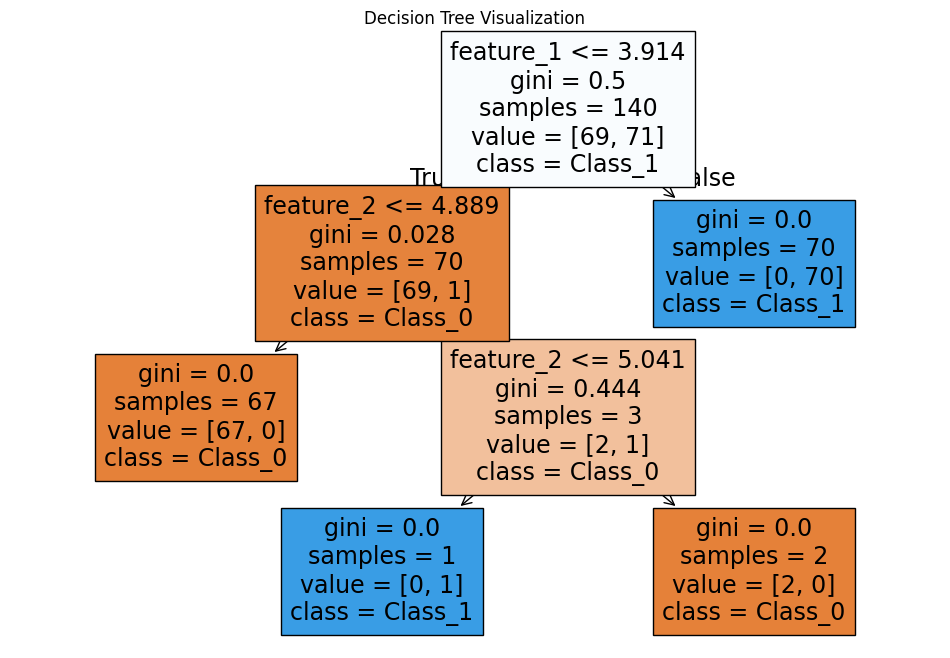

In [8]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=["feature_1", "feature_2"], class_names=["Class_0", "Class_1"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()